Маркус Владислав, 23М07-мм, практическое задание №2 "Линейная регрессия и градиентный спуск"

**Выполнено** - Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. Использовать матрично-векторные операции для вычисления градиента.

**Выполнено** - Найти данные, на которых интересно будет решать задачу регрессии. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).

**Выполнено** - Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

**Выполнено** - При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

**Выполнено** - Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

**Выполнено** - При обучении моделей использовать масштабирование данных.

**Выполнено** - Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R2.

**Выполнено** - Обучить модель, используя существующую библиотеку. Сравнить качество с Вашей реализацией.

**Выполнено** - Повторить тоже самое, но используя кросс-валидацию.

**Выполнено** - Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

**Выполнено** - (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE) из sklearn.

**Не выполнено** - (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

**Выполнено** - (+1 балл) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

**Не выполнено** - (+1 балл) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
def fict_feature(X: np.ndarray):
    X_copy = X.copy()
    if X.ndim == 1:
        X_copy = X_copy.reshape(-1, 1)
    ones = np.ones((X_copy.shape[0], 1))
    return np.concatenate((ones, X_copy), axis=1)

def linear_model(X: np.ndarray, W: np.ndarray):
    X = fict_feature(X)
    return np.matmul(X, W)

In [3]:
def gradient_descent(X: np.ndarray, y: np.ndarray):
    elems_count = np.shape(X)[0]
    params_count = np.shape(X)[1]
    X = fict_feature(X)
    step = 1
    W = np.random.randn(params_count + 1, )
    cost_history = []
    while True:
        pred = X.dot(W)
        err = pred - y
        regL2 = np.sum(np.square(W[1:]))
        cost = (1 / params_count) * np.sum(err ** 2) + 20*regL2
        gradient = (1 / step) * (X.T.dot(err) + 20*W)
        shift = 0.02 * gradient
        W = W - shift
        cost_history.append(cost)
        if step >= 2:
            cd = cost_history[step - 1] - cost_history[step - 2]
            if (abs(cd) < 0.0001) or np.all(abs(shift) < 0.0001):
                return W, cost_history
        step += 1

In [4]:
def stochastic_gradient_descent(X: np.ndarray, y: np.ndarray):
    elems_count = np.shape(X)[0]
    params_count = np.shape(X)[1]
    X = fict_feature(X)
    step = 1
    W = np.random.randn(params_count + 1, ).reshape(params_count + 1, 1)
    cost_history = []
    while True:
        idx = np.random.randint(0, elems_count)
        X_i = X[idx, :].reshape(1, params_count + 1)
        y_i = y[idx].reshape(1, 1)
        pred = X_i.dot(W)
        err = pred - y_i
        regL2 = np.sum(np.square(W[1:]))
        cost = (1 / params_count) * np.sum(err ** 2) + 20 * regL2
        gradient = (X_i.T.dot(err) + 20 * W)
        shift = 0.02 * gradient
        W = W - shift
        cost_history.append(cost)
        if step >= 2:
            cd = cost_history[step - 1] - cost_history[step - 2]
            if (abs(cd) < 0.0001) or np.all(abs(shift) < 0.0001) \
                    or step == 1000000:
                return W, cost_history
        step += 1

Градинтный спуск с применением MSE и L2 регулятора реализован, также реализованы стохастический градиентный спуск и метод мини-пакетного градиентного спуска, теперь можно приступать к подготовке данных.

In [5]:
df = pd.read_csv("D:/INSTALL/SPbU/ML/car_price.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Признаки:
* symboling - рейтинг страхового риска (+3 - самая рисковая, -3 - самая безопасная)
* CarName - название
* fueltype - тип топлива
* aspiration - наличие турбонаддува
* doornumber - кол-во дверей
* carbody - кузов
* drivewheel - тип привода
* enginelocation - расположение двигателя
* wheelbase - ширина колёсной базы
* carlength - длина автомобиля
* carwidth -ширина
* carheight - высота
* enginetype - тип двигателя
* cylindernumber - число цилиндров
* enginesize - размер дивгателя(?)
* fuelsystem - тип впрыска
* boreratio - диаметр цилиндра
* stroke - объём мотора
* compressionratio - степень сжатия
* horsepower - л/с
* peakrpm - макс. обороты
* citympg - пробег по городу
* highwaympg - пробег за городом
* price - цена

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

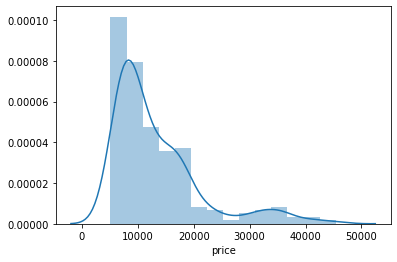

In [7]:
sns.distplot(df['price'], kde = True)

Большинство автомобилей имеют цену в районе 100-200к, более дорогих автомобилей значительно меньше.

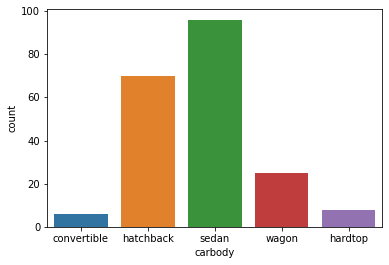

In [8]:
sns.countplot('carbody', data=df);

Большинство автомобилей из выборки - седаны, недалеко от них по числу ушли хэтчбэки.

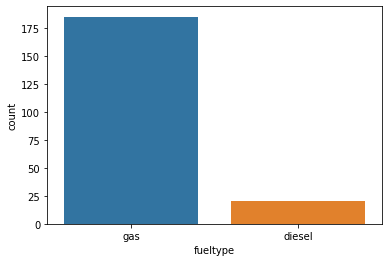

In [9]:
sns.countplot('fueltype', data=df);

Большинство автомобилей - бензиновые.

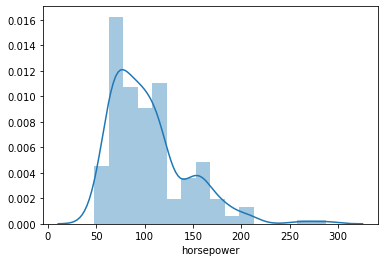

In [10]:
sns.distplot(df['horsepower'], kde = True)

Большинство автомобилей имеют мощность двигателя от 50 до 130 л/с, но встречаются и особо мощные экземпляры смощностью ок. 280 л/с.

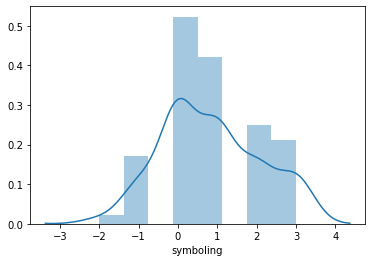

In [11]:
sns.distplot(df['symboling'])

Явно видно 3 класса автомобилей относительно их страхового риска.

In [12]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Полноприводных автомобилей мало, но не настолько, чтобы совсем исключать их из выборки.

In [13]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [14]:
le = LabelEncoder()
columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for column in columns:
    df[column] = le.fit_transform(df[column])

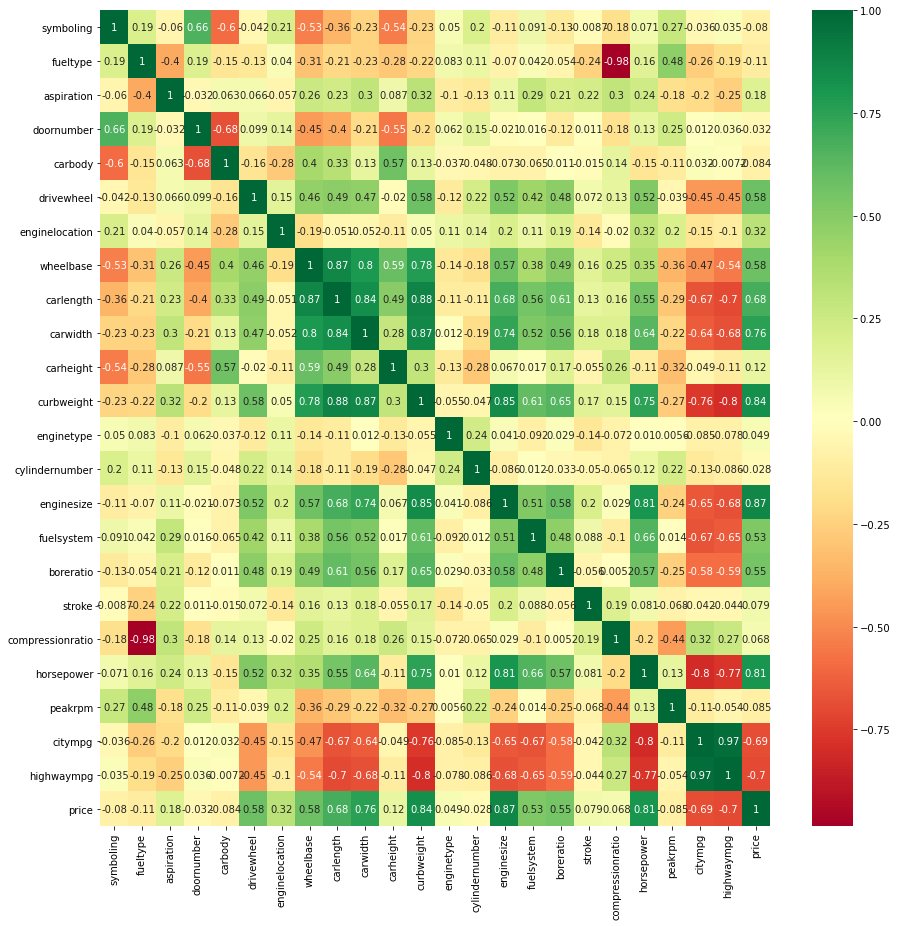

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', xticklabels=True, yticklabels=True)
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

Видим явные пары коррелирующих признаков, исключим некотрые. При этом, избавляться от признаков, у которых высокая корреляция с целевым признаком price, высокая, не очень выгодно. А вот признаки, которые практически с ним не коррелируют, и слабо коррелируют с другими, можно также смело исключить. Удалять можно в несколько этапов, так как параметров много.

In [16]:
df.drop(['compressionratio', 'stroke', 'peakrpm', 'cylindernumber', 'enginetype', 'carbody', 'doornumber'], axis=1, inplace=True)

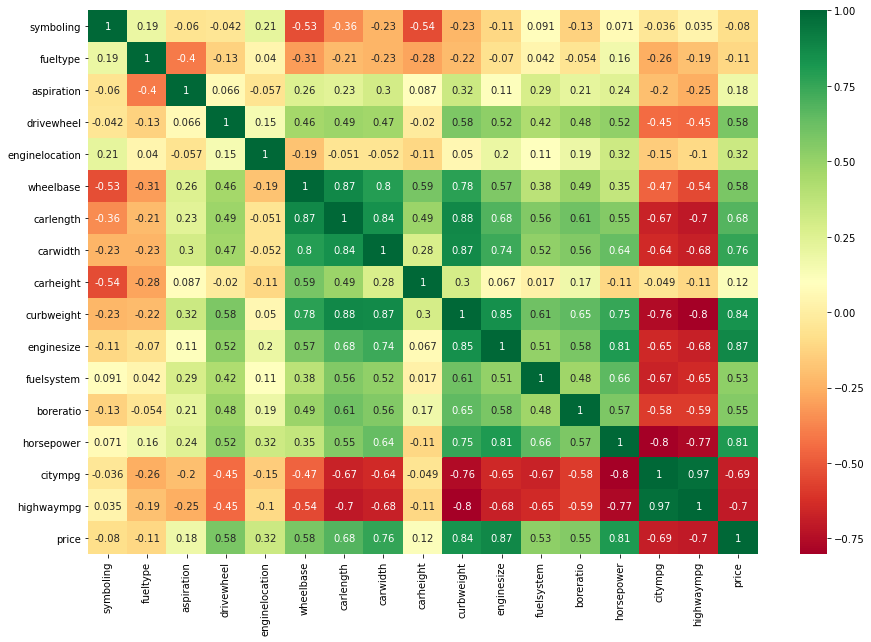

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Продолжаем исключать лишние признаки.

In [18]:
df.drop(['highwaympg', 'carheight', 'aspiration', 'symboling', 'fueltype'], axis=1, inplace=True)

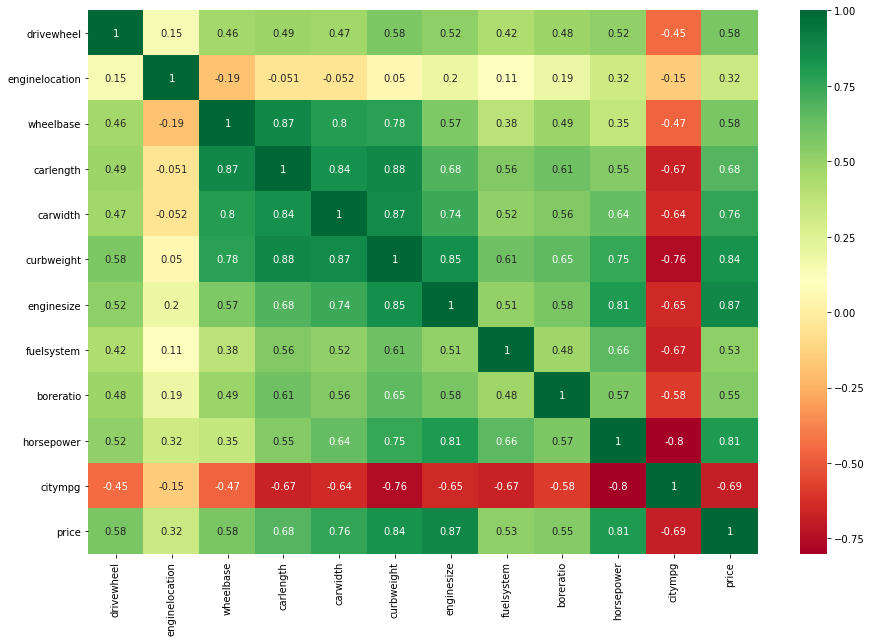

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

Осталось только убирать коррелирующие между собой признаки, не потеряв много факторов влияния на целевой признак price.

In [20]:
df.drop(['horsepower', 'carwidth', 'wheelbase', 'curbweight', 'enginelocation', 'enginesize'], axis=1, inplace=True)

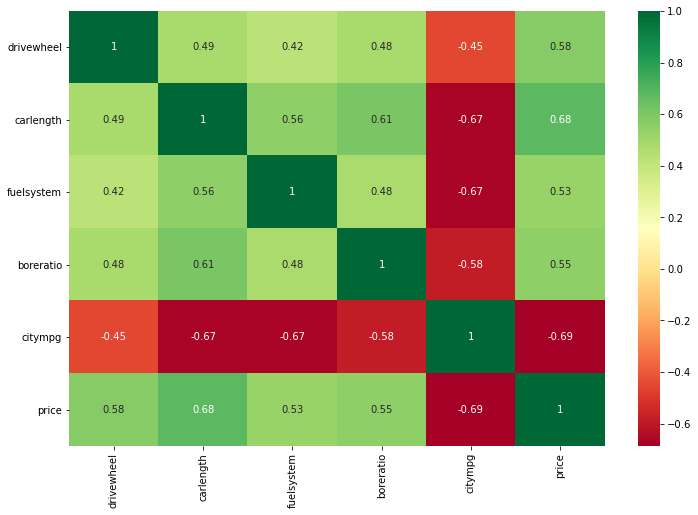

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

С такой корреляционной картиной в целом можно работать. Признак Citympg имеет высокие коэффициенты корреляции с другими, но недостаточно, чтобы его убирать.

In [22]:
df.isnull().sum()

drivewheel    0
carlength     0
fuelsystem    0
boreratio     0
citympg       0
price         0
dtype: int64

Нулевых значений нет, категориальные признаки переведены в числовые, можно работать дальше.

In [23]:
from sklearn.model_selection import train_test_split
y = df["price"]
X = df.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Данные разибты на выборки, необходимо их масштабировать.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Перед обучением моделей подберём наилучшее количество (и само подмножество) признаков, используя Recursive Feature Elimination (RFE) из sklearn

In [25]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=2, scoring='accuracy')
lab = LabelEncoder()

y_transformed = lab.fit_transform(y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
rfecv.fit(X_train_scaled_df, y_transformed)

optimal_features = rfecv.n_features_
selected_features = list(X_train_scaled_df.columns[rfecv.support_])

print(f"Optimal number of features = {optimal_features}")
print(f'Optimal features = {selected_features}')

Optimal number of features = 5
Optimal features = ['drivewheel', 'carlength', 'fuelsystem', 'boreratio', 'citympg']


Оптимальное количество признаков соответствует имеющемуся, дополнительные правки не требуются.
Обучим модель с помощью функции gradient_descent

In [26]:
W, _ = gradient_descent(X=X_train_scaled, y=y_train)
W

array([11763.28834544,  1605.76032234,  1925.27141034,   162.30551611,
         610.75428756, -2828.56509317])

Оценим качество полученной модели.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred_gd = linear_model(X_train_scaled, W)
y_test_pred_gd = linear_model(X_test_scaled, W)
print(f"MSE train = {mean_squared_error(y_train, y_train_pred_gd, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_gd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_gd, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_gd, squared=False)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_gd)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_gd)}")

MSE train = 24568012.428464048
MSE test = 36811122.18316301

RMSE train = 4956.612999666612
RMSE test = 6067.217004785885

R^2 train = 0.5969127687855156
R^2 test = 0.46869521065212694


Теперь обучим модель с помощью функции stochastic_gradient_descent

In [28]:
W_stochastic, _ = stochastic_gradient_descent(X=X_train_scaled, y=y_train.to_numpy())
W_stochastic

array([[ 993.14867894],
       [ 863.40709684],
       [-217.21961527],
       [ 423.20016885],
       [1189.46923371],
       [-788.70890626]])

Оценим качество

In [29]:
y_train_pred_sgd = linear_model(X_train_scaled, W_stochastic)
y_test_pred_sgd = linear_model(X_test_scaled, W_stochastic)

print(f"MSE train = {mean_squared_error(y_train, y_train_pred_sgd, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_sgd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_sgd, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_sgd, squared=False)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_sgd)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_sgd)}")

MSE train = 192922248.3001447
MSE test = 193488718.30070895

RMSE train = 13889.645362648562
RMSE test = 13910.022225025701

R^2 train = -2.1652741601873373
R^2 test = -1.7926745130570443


Обучим модель с помощью существующей библиотеки.

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge()
_ = ridge.fit(X_train_scaled, y_train)

Оценим качество

In [31]:
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

print(f"MSE train = {mean_squared_error(y_train, y_train_pred_ridge, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_ridge, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_ridge, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_ridge, squared=False)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_ridge)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_ridge)}")

MSE train = 21527777.868010167
MSE test = 33751412.42597099

RMSE train = 4639.803645415414
RMSE test = 5809.596580311837

R^2 train = 0.6467938788176857
R^2 test = 0.5128568213718916


Далее необходимо сделать то же самое, но с использованием кросс-валидации. Совместим это задание со следующим пунктом - созданием таблицы. Количество фолдов возьмём = 3.

In [34]:
from sklearn.model_selection import KFold

gd_results_df = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=3)

for fold, (train, test) in enumerate(kfold.split(X=X_train_scaled_df, y=y_train)):

    W, _ = gradient_descent(X_train_scaled_df.iloc[train, :], y_train.iloc[train])

    y_fold_train = linear_model(X_train_scaled_df.iloc[train, :], W)
    y_fold_test = linear_model(X_train_scaled_df.iloc[test, :], W)

    gd_results_df.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(y_train.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train.iloc[train], y_fold_train, squared=False),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=False),
                          r2_score(y_train.iloc[train], y_fold_train),
                          r2_score(y_train.iloc[test], y_fold_test)])

mean = gd_results_df.mean(axis=1)
std = gd_results_df.std(axis=1)
gd_results_df["MEAN"] = mean
gd_results_df["STD"] = std
gd_results_df

,Fold 1,Fold 2,Fold 3,MEAN,STD
MSE train,2.779119e+07,3.033151e+07,2.202482e+07,2.671584e+07,4.256470e+06
MSE test,2.963514e+07,2.067828e+07,4.874860e+07,3.302067e+07,1.433813e+07
RMSE train,5.271735e+03,5.507405e+03,4.693061e+03,5.157400e+03,4.190385e+02
RMSE test,5.443816e+03,4.547338e+03,6.982020e+03,5.657725e+03,1.231356e+03
R2 train,6.055523e-01,5.445643e-01,5.075645e-01,5.525604e-01,4.948086e-02
R2 test,2.824278e-01,5.701584e-01,4.527271e-01,4.351044e-01,1.446725e-01


In [35]:
sgd_results_df = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=3)

for fold, (train, test) in enumerate(kfold.split(X=X_train_scaled_df, y=y_train)):

    W_stochastic, _ = stochastic_gradient_descent(X_train_scaled_df.iloc[train, :], y_train.iloc[train].to_numpy())

    y_fold_train = linear_model(X_train_scaled_df.iloc[train, :], W_stochastic)
    y_fold_test = linear_model(X_train_scaled_df.iloc[test, :], W_stochastic)

    sgd_results_df.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(y_train.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train.iloc[train], y_fold_train, squared=False),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=False),
                          r2_score(y_train.iloc[train], y_fold_train),
                          r2_score(y_train.iloc[test], y_fold_test)])

mean = sgd_results_df.mean(axis=1)
std = sgd_results_df.std(axis=1)
sgd_results_df["MEAN"] = mean
sgd_results_df["STD"] = std
sgd_results_df

,Fold 1,Fold 2,Fold 3,MEAN,STD
MSE train,1.733475e+08,2.318657e+08,2.020467e+08,2.024200e+08,2.926088e+07
MSE test,1.635802e+08,1.782571e+08,3.343531e+08,2.253968e+08,9.464384e+07
RMSE train,1.316615e+04,1.522714e+04,1.421431e+04,1.420253e+04,1.030544e+03
RMSE test,1.278985e+04,1.335129e+04,1.828532e+04,1.480882e+04,3.023798e+03
R2 train,-1.460366e+00,-2.481525e+00,-3.517401e+00,-2.486431e+00,1.028526e+00
R2 test,-2.960859e+00,-2.705448e+00,-2.753592e+00,-2.806633e+00,1.357153e-01


In [38]:
from sklearn.model_selection import cross_val_score

ridge_results_df = pd.DataFrame(index=['MSE train',
                                    'RMSE train',
                                    'R2 train'])

mse_train = cross_val_score(ridge, X_train_scaled, y_train, cv=3, scoring="neg_mean_squared_error")
rmse_train = cross_val_score(ridge, X_train_scaled, y_train, cv=3, scoring="neg_root_mean_squared_error")
r2_train = cross_val_score(ridge, X_train_scaled, y_train, cv=3, scoring="r2")

for fold in range(mse_train.size):
    ridge_results_df.insert(fold, f"Fold {fold + 1}", [-mse_train[fold],
                                                       -rmse_train[fold],
                                                       r2_train[fold]])
mean = ridge_results_df.mean(axis=1)
std = ridge_results_df.std(axis=1)
ridge_results_df["MEAN"] = mean
ridge_results_df["STD"] = std
ridge_results_df

,Fold 1,Fold 2,Fold 3,MEAN,STD
MSE train,2.520525e+07,1.760454e+07,3.494634e+07,2.591871e+07,8.692886e+06
RMSE train,5.020483e+03,4.195777e+03,5.911543e+03,5.042601e+03,8.580970e+02
R2 train,3.896911e-01,6.340525e-01,6.076772e-01,5.438069e-01,1.341182e-01


Выводы из работы над моделями:
* Модель gradient_descent по точности схожа с ridge, особенно после кросс-валидации.
* Модель stohastic_gradient_descent очень медленно сходится, по сравнению с gradients_descent, однако также имеет точность, сопоставимую с двумя другими моделями.
Из двух созданных моделей именно gradient_descent наилучшим образом подходит для решения поставленнной задачи.